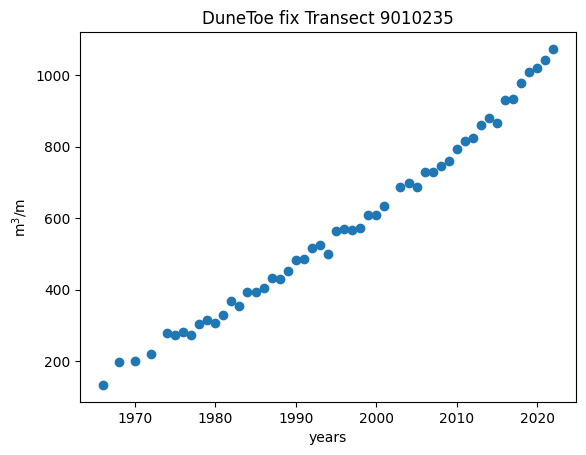

In [3]:
filename = r'C:\Users\svries\Documents\GitHub\JAT\Examples\DuneVolumeS\C_dimensions_dataframes_per_transect\Transect_9010235_dataframe.pickle'
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pwlf

with open(filename, 'rb') as f:
    data = pickle.load(f)
    # plot DuneVol_fix
    fig, ax = plt.subplots()
    data['DuneVol_fix'].plot(ax=ax,marker='o', linestyle='None')
    
    # set marker without line

    # set title dunetoe fix and transect id
    ax.set_title('DuneToe fix' + ' Transect 9010235')
    # set axis label 
    ax.set_ylabel('m$^3$/m')

    # Save plot to C:\Users\svries\Documents\GitHub\JAT\Examples\DuneVolumeS\DV_plots folder
    plt.savefig(r'C:\Users\svries\Documents\GitHub\JAT\Examples\DuneVolumeS\DV_plots\DuneToe_fix_9010235.png')

    plt.show()



0.9864439759659811


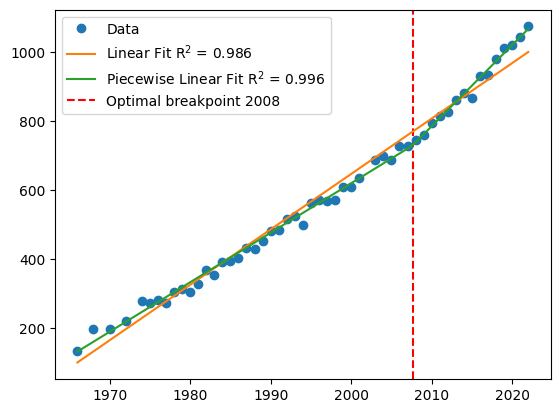

In [30]:
import pandas as pd
import numpy as np
import pwlf

# Ensure necessary modules are imported
import matplotlib.pyplot as plt

# filter data for nans in the DuneVol_fix column
data = data.dropna(subset=['DuneVol_fix'])

# Example data
x = data.index
y = data['DuneVol_fix']

# Initialize piecewise linear fit with the data
my_pwlf = pwlf.PiecewiseLinFit(x, y)
res1 = my_pwlf.fit(1)
y_hat1 = my_pwlf.predict(x)

# Print R^2 value for the linear fit
print(my_pwlf.r_squared())

# Plot the results
fig, ax = plt.subplots()
ax.plot(x, y, 'o', label='Data')
ax.plot(x, y_hat1, '-', label='Linear Fit R$^2$ = ' + str(my_pwlf.r_squared())[0:5])

# Fit the data with 2 line segments
res2 = my_pwlf.fit(2)
y_hat2 = my_pwlf.predict(x)

# Plot the piecewise linear fit
ax.plot(x, y_hat2, '-', label='Piecewise Linear Fit R$^2$ = ' + str(my_pwlf.r_squared())[0:5])

# Add vertical line for the optimal breakpoint
ax.axvline(x=res2[1], color='r', linestyle='--', zorder=0, label='Optimal breakpoint ' + str(res2[1].round())[0:4])

# Add legend and show plot
ax.legend()
plt.show()




In [15]:
res2[1]

np.float64(2007.634002110254)

[0.         7.66037743 9.        ]


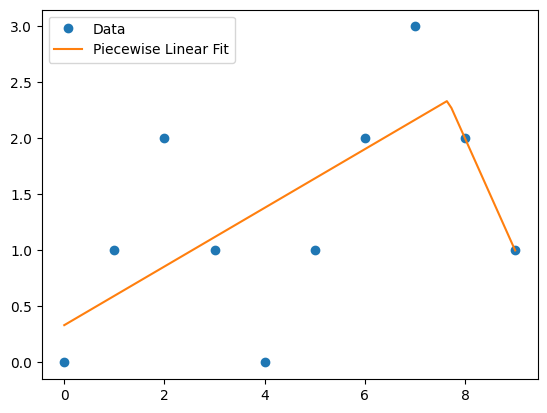

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import pwlf

# Example data
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
y = np.array([0, 1, 2, 1, 0, 1, 2, 3, 2, 1])

# Initialize piecewise linear fit with the data
my_pwlf = pwlf.PiecewiseLinFit(x, y)

# Fit the data with 2 line segments
res = my_pwlf.fit(2)
print(res)

# Predict the y values
x_hat = np.linspace(min(x), max(x), num=100)
y_hat = my_pwlf.predict(x_hat)

# Plot the results
plt.figure()
plt.plot(x, y, 'o', label='Data')
plt.plot(x_hat, y_hat, '-', label='Piecewise Linear Fit')
plt.legend()
plt.show()

In [2]:
import pwlf
import pickle


# load pickle file
filename = r'C:\Users\svries\Documents\GitHub\JAT\Examples\DuneVolumeS\D_dataframes_per_dimension\DuneVol_fix_dataframe.pickle'
data = pickle.load(open(filename, 'rb'))
			

In [55]:
import pwlf
import pickle


# load pickle file
filename = r'C:\Users\svries\Documents\GitHub\JAT\Examples\DuneVolumeS\D_dataframes_per_dimension\DuneVol_fix_dataframe.pickle'
data = pickle.load(open(filename, 'rb'))
			

# 'data' contains dune volume (1965-2022) per transect
############################################
# Break point detection entire Dutch coast #
############################################
# Break point year
years = range(1975, 2015)
# List rmse, slope before, slope after per transect per (break point) year.
rmse_dfs = []
slope_b_dfs = []
slope_a_dfs = []
for i in years:
	# Dictionary rmse, slope before, slope after for each transect
	rmse_data = {}
	slope_b_data = {}
	slope_a_data = {}
	# calculation rmse, slope before, slope after per transect:
	# for col in data.columns:
	for col in data.columns[1437:1440]:
		transect = data[str(col)].dropna()
		x = transect.index
		y = transect
		# Divide data into two segments.
		x0 = np.array([1965, i, 2023])
		# Best fit for break point year i
		my_pwlf = pwlf.PiecewiseLinFit(x, y)
		my_pwlf.fit_with_breaks(x0)
		# rmse for break point year i
		y_pred = my_pwlf.predict(x)
		rmse = np.sqrt(np.mean((y - y_pred)**2))
		# Correlation r^2 per break point year i
		r = my_pwlf.r_squared()
		# Slope (DVC) before and after per break point year i
		slopes = my_pwlf.calc_slopes()
		
		# Add rmse, slope before, slope after to dictionary
		rmse_data[str(col)] = rmse
		slope_b_data[str(col)] = slopes[0]
		slope_a_data[str(col)] = slopes[1]
	# Add dictionary to list
	rmse_dfs.append(pd.DataFrame(rmse_data, index=[i]))
	slope_b_dfs.append(pd.DataFrame(slope_b_data, index=[i]))
	slope_a_dfs.append(pd.DataFrame(slope_a_data, index=[i]))
rmse_df = pd.concat(rmse_dfs, axis=0)
slope_b_df = pd.concat(slope_b_dfs, axis=0)
slope_a_df = pd.concat(slope_a_dfs, axis=0)
# Determine average rmse, slope before, slope after for each break point year
R = rmse_df.mean(axis=1)
SB = slope_b_df.mean(axis=1)
SA = slope_a_df.mean(axis=1)
# Determine optimal rmse, slope before, slope after
tb_year = R.idxmin()
tb_slope_a = SA.loc[R.idxmin()]
tb_slope_b = SB.loc[R.idxmin()]

RuntimeError: The map-like callable must be of the form f(func, iterable), returning a sequence of numbers the same length as 'iterable'

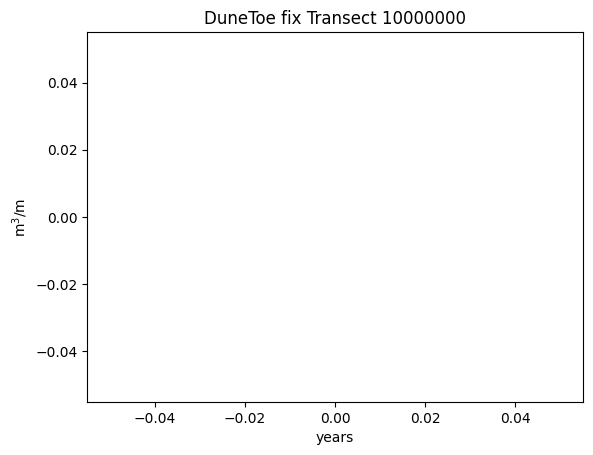

In [58]:
import os
import pickle
import pwlf
import numpy as np
import matplotlib.pyplot as plt

folder = r'C:\Users\svries\Documents\GitHub\JAT\Examples\DuneVolumeS\C_dimensions_dataframes_per_transect'

for file in os.listdir(folder):
    if file.endswith('.pickle'):
        with open(os.path.join(folder, file), 'rb') as f:
            data = pickle.load(f)
            fig, ax = plt.subplots()
            data['DuneVol_fix'].plot(ax=ax,marker='o', linestyle='None')
            ax.set_title('DuneToe fix' + ' Transect ' + file.split('_')[1].split('.')[0])
            ax.set_ylabel('m$^3$/m')

            # add piecewise linear fit to plot
            for i in data['DuneVol_fix'].index:
                x = data['DuneVol_fix'].index
                y = data['DuneVol_fix'].values
                my_pwlf = pwlf.PiecewiseLinFit(x, y)
                breaks = my_pwlf.fit(2)
                xHat = np.linspace(x.min(), x.max(), num=1000)
                yHat = my_pwlf.predict(xHat)
                plt.plot(xHat, yHat, 'r', linewidth=2)





            plt.savefig(r'C:\Users\svries\Documents\GitHub\JAT\Examples\DuneVolumeS\DV_plots\DuneToe_fix_' + file.split('_')[1].split('.')[0] + '.png')
            # close plot
            plt.close()
            


In [ ]:
#


'Transect_10000602_dataframe.pickle'

In [40]:
data.columns[1437:1440:]

Index(['8009625', '8009650', '8009675'], dtype='object')